##### Linear Regression

#### Libraries

In [24]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import datasets
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from statsmodels.compat import lzip
import statsmodels.formula.api as smf

#### Data

In [2]:
data = datasets.load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=["MEDV"])

#### Regression

In [4]:
X = df["RM"]
X = sm.add_constant(X)
y = target["MEDV"]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           2.49e-74
Time:                        10:45:34   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

##### Predictions

In [21]:
predictions = results.predict(X)
predictions

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
5      23.855940
6      20.051258
7      21.507596
8      16.583355
9      19.978442
10     23.373528
11     20.023952
12     18.931699
13     19.477826
14     20.815836
15     18.431083
16     19.350396
17     19.851012
18     14.990486
19     17.457157
20     16.028126
21     19.623459
22     21.234533
23     18.239939
24     19.250273
25     16.292087
26     18.239939
27     20.369832
28     24.447577
29     26.076855
         ...    
476    24.347454
477    13.606965
478    21.625923
479    22.026416
480    22.144743
481    26.768615
482    29.599371
483    17.775731
484    18.767861
485    22.781891
486    20.979674
487    19.077333
488    14.972282
489    14.608197
490    11.686420
491    19.787297
492    19.787297
493    17.275115
494    19.268477
495    16.938337
496    14.389747
497    18.066999
498    20.114973
499    16.019024
500    20.187790
501    25.339584
502    21.034286
503    28.8256

##### Parameters

In [5]:
results.params

const   -34.670621
RM        9.102109
dtype: float64

#### R-Squared

In [6]:
results.rsquared

0.48352545599133423

#### Normality Tests

In [10]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(results.resid)
lzip(name, test)

[('Jarque-Bera', 612.4489850641665),
 ('Chi^2 two-tail prob.', 1.01951276941168e-133),
 ('Skew', 0.7260938668535385),
 ('Kurtosis', 8.19038673939902)]

In [11]:
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(results.resid)
lzip(name, test)

[('Chi^2', 102.58477355081469), ('Two-tail probability', 5.29662785058548e-23)]

#### Influence Tests

In [12]:
from statsmodels.stats.outliers_influence import OLSInfluence
test_class = OLSInfluence(results)
test_class.dfbetas[:5,:]

array([[ 0.00237417, -0.00327248],
       [ 0.00120034, -0.00284122],
       [-0.03120326,  0.03439185],
       [-0.02651436,  0.02997318],
       [-0.04359751,  0.04825544]])

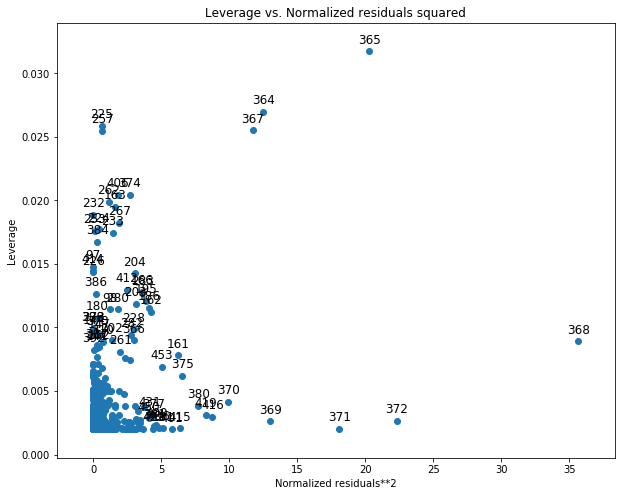

In [14]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(10,8))
fig = plot_leverage_resid2(results, ax = ax)

#### Multicollinearity

In [15]:
np.linalg.cond(results.model.exog)

58.378667372542125

#### Heteroskedasticity Tests

##### Breusch Pagan Test

In [17]:
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 0.006987090752415437),
 ('p-value', 0.9333833565379862),
 ('f-value', 0.006959569893995327),
 ('f p-value', 0.9335474998843825)]

##### Goldfeld Quandt Test

In [18]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(results.resid, results.model.exog)
lzip(name, test)

[('F statistic', 4.034296808384787), ('p-value', 1.0311298016846402e-26)]

#### Harvey Collier Multiplier Test

In [19]:
name = ['t value', 'p value']
test = sms.linear_harvey_collier(results)
lzip(name, test)

[('t value', -3.2297027973144905), ('p value', 0.0013203724092921549)]

#### Influence Plots

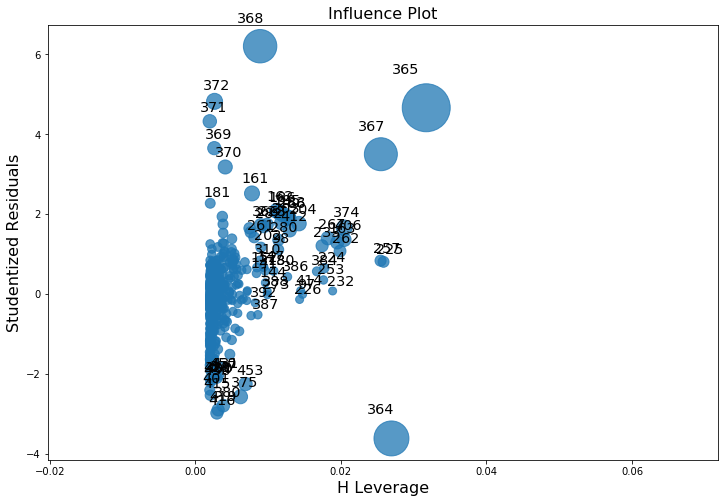

In [21]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion="cooks")